# Importing libraires

In [91]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing dataset

In [6]:
path=r'/Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Prepared Data '
path

'/Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Prepared Data '

In [7]:
df=pd.read_csv(os.path.join(path, 'insurance_cleaned.csv'))

# Cleaning Dataset

In [10]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64


In [12]:
# Correcting Data Types:
df['smoker'] = df['smoker'].astype('category')
df['charges'] = df['charges'].astype('float')

In [16]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [17]:
# Detecting outliers in 'charges'
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
filter = (df['charges'] >= q1 - 1.5 * iqr) & (df['charges'] <= q3 + 1.5 * iqr)
df = df.loc[filter]

# Visualizing the scatterplot

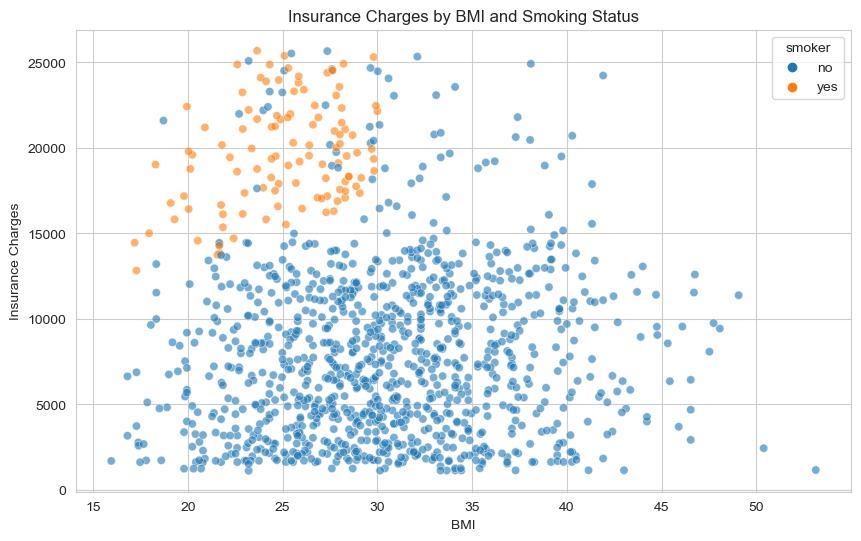

In [18]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a scatterplot of 'bmi' vs 'charges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', alpha=0.6)
plt.title('Insurance Charges by BMI and Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

In this scatterplot, using hue='smoker' allows us to see if smoking status also affects insurance charges along with BMI. It clearly shows that smokers generally incur higher insurance charges than non-smokers across all BMI levels. While BMI does not show a strong correlation with charges for non-smokers, there is a slight increase in charges with higher BMI for smokers. This visual evidence suggests smoking status is a significant factor in insurance costs, and there's a potential interaction between smoking and BMI that could be explored further with statistical analysis.

## Hypothesis

Given the observed patterns in the scatterplot of insurance charges against BMI, differentiated by smoking status, we propose the following hypotheses for statistical testing:

**Null Hypothesis (H0):** There is no significant difference in insurance charges between smokers and non-smokers when controlling for BMI.

**Alternative Hypothesis (H1):** Smokers have significantly higher insurance charges than non-smokers at similar BMI levels.

We will test this hypothesis at a 0.05 alpha level to determine if the difference in charges between smokers and non-smokers is statistically significant after accounting for variations in BMI.

# Reshaping the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [77]:
# Reshape the variables into NumPy arrays
X = df['bmi'].values.reshape(-1, 1)  # Independent variable array
y = df['charges'].values.reshape(-1, 1)  # Dependent variable array

In [78]:
# Output the shapes of X and y to confirm the reshaping
X.shape, y.shape

((1143, 1), (1143, 1))

In [79]:
X

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [31.92],
       [36.85],
       [25.8 ]])

# Spliting the data into two sets: a training set and a test set.

In [80]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In this code:

X represents my independent variable array.

y represents my dependent variable array.

test_size=0.3 indicates that 30% of the data will be reserved for testing, while the remaining 70% will be used for training.

random_state=0 ensures reproducibility by fixing the random seed. I chose 0, but any integer value can be used for random_state, or it can be omitted to use a different random seed each time.

Now, with X_train and y_train, I can train my model, and with X_test and y_test, I can evaluate its performance. This splitting process ensures that I have distinct datasets for training and testing, which is crucial for accurately assessing the model's generalization ability.

# Linear regression on the data.

In [81]:
# Create a linear regression model
regression = LinearRegression()

In [82]:
# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

We created a linear regression model using scikit-learn's LinearRegression class.
This model was trained on the training set (X_train and y_train) using the fit method.
During training, the model learned the relationship between the independent variable (X_train) and the dependent variable (y_train).

In [106]:
# Create predictions for y on the test set
y_pred = model.predict(X_test)
y_pred

array([ 8860.37157288, 10028.95315151,  8628.16148475,  9082.95854024,
        8256.20694719,  8749.0780892 ,  9369.14178398,  9472.48573311,
        9392.99038763,  7342.01047411,  9233.99969666,  9044.88445371,
        9162.45388572,  9046.55803993,  8701.38088191,  9337.34364579,
        9154.50435117,  7938.22556525,  9173.75059271,  9170.40342027,
        8179.64037759,  8501.80572508,  8868.32110743,  9671.22409683,
        9257.8483003 ,  8483.39627666,  8884.22017652,  9329.39411124,
        9202.20155846,  8452.43493157,  8837.35976234,  8695.10493358,
        9567.8801477 ,  8677.53227826,  8869.99469365,  8908.06878017,
        9054.92597104,  7894.29392696,  8661.63320916,  8367.50043087,
        9027.3117984 ,  8686.73700248,  8955.76598746,  9536.0820095 ,
        8925.22303893,  8836.52296923,  9201.36476535,  8768.74272729,
        9480.43526766,  9186.30248937,  9172.07700649,  8962.8787289 ,
        9226.05016211,  9329.39411124,  9054.92597104,  8264.15648174,
      

In [112]:
# Convert X_test to a DataFrame if it isn't already one
X_test_df = pd.DataFrame(X_test, columns=['bmi'])
# Add the actual 'charges' and predicted 'charges' to the DataFrame
X_test_df['actual_charges'] = y_test   # Add actual charges
X_test_df['predicted_charges'] = y_pred 

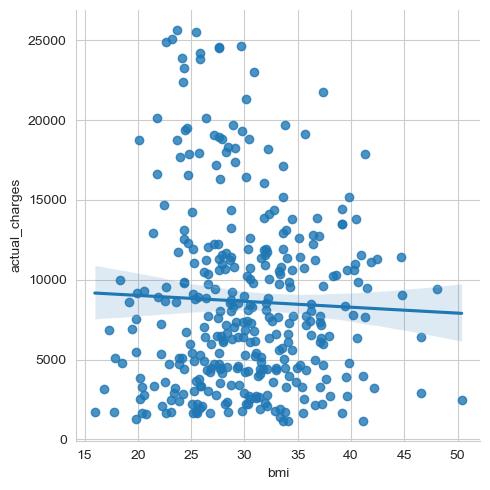

In [110]:
 # To plot the actual charges
sns.lmplot(x='bmi', y='actual_charges', data=X_test_df)

The plot shows actual insurance charges plotted against BMI, with a linear regression line fitted to the data. The data points are widely spread, and the confidence interval (shaded area) around the regression line is quite broad, especially in areas with higher BMIs. This suggests that the variability in charges is significant, and while there might be a trend indicating that charges increase with higher BMI, there's a considerable amount of scatter. The line doesn't seem to fit the data tightly, which implies the model may not be very accurate in predicting individual charges based on BMI alone.
Considering these observations, it appears that the model may not be capturing the complexity of the dataset adequately, or there may have been an error during the prediction or plotting process. A better fit would show a regression line with a narrower confidence interval that more closely follows the trend of the actual data points. 

In [114]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R² score: {r2}')

MSE: 33005989.670358106
R² score: -0.0021246896020774564


# Create a DataFrame with both the actual and predicted values

In [118]:
data = pd. DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred. flatten ()})
data. head (30)

,Actual,Predicted
0,8988.15875,8860.371573
1,1694.79640,10028.953152
2,3591.48000,8628.161485
3,9447.25035,9082.958540
4,6334.34355,8256.206947
5,3956.07145,8749.078089
6,2395.17155,9369.141784
7,9566.99090,9472.485733
8,8603.82340,9392.990388
9,9432.92530,7342.010474


The model's performance on the test set is not satisfactory. The high Mean Squared Error (MSE) indicates that the model's predictions are often far off from the actual charges, and the R² score being near zero suggests the model explains none of the variability in the charges. These statistics indicate the model is not a good fit.

Considering the scatterplot that shows actual charges by BMI, it's apparent that while there is a trend for higher charges with an increasing BMI, the relationship is not strong, especially for non-smokers. The confidence interval's width suggests that the model does not predict with certainty and there's a high level of variability that BMI alone can't explain.

Data bias could be significantly impacting the model's performance. It is possible that the dataset has underlying biases, such as an unequal distribution of smokers to non-smokers or other unaccounted factors that influence insurance charges like age, sex, or geographical region. These biases could skew the model's predictions and make them less reliable. The model could be improved by including more relevant features that affect insurance charges and applying feature engineering to capture non-linear relationships.